In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori, association_rules

In [118]:
NBA = pd.read_csv('games_details.csv', low_memory=False)

In [119]:
NBA

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [120]:
clean_league = NBA.drop(
    [
        'GAME_ID',
        'TEAM_ID',
        'PLAYER_ID',
        'PLUS_MINUS',
        'PTS'
    ],
    axis = 1
)

clean_league.insert(loc = 7, column = 'PLUS_MINUS', value = NBA['PLUS_MINUS'])
clean_league.insert(loc = 8, column = 'PTS', value = NBA['PTS'])

#clean_league = clean_league.fillna(0)

In [121]:
clean_league

,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,PLUS_MINUS,PTS,FGM,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
0,MIN,Minnesota,Anthony Edwards,Anthony,F,NaN,36:22,5.0,15.0,4.0,...,4.0,1.000,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0
1,MIN,Minnesota,Jaden McDaniels,Jaden,F,NaN,23:54,10.0,14.0,6.0,...,1.0,1.000,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0
2,MIN,Minnesota,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,14.0,15.0,4.0,...,8.0,0.750,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0
3,MIN,Minnesota,Malik Beasley,Malik,G,NaN,30:52,20.0,12.0,4.0,...,0.0,0.000,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0
4,MIN,Minnesota,D'Angelo Russell,D'Angelo,G,NaN,33:46,17.0,14.0,3.0,...,7.0,1.000,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,DEN,Denver,Jordan Hamilton,NaN,NaN,NaN,19,NaN,17.0,4.0,...,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0
645949,DEN,Denver,Kenneth Faried,NaN,NaN,NaN,23,NaN,18.0,7.0,...,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0
645950,DEN,Denver,Kosta Koufos,NaN,NaN,NaN,15,NaN,6.0,3.0,...,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0
645951,DEN,Denver,Timofey Mozgov,NaN,NaN,NaN,19,NaN,2.0,1.0,...,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0


In [122]:
teams = clean_league.groupby(['TEAM_CITY'])
teams = teams.sum()

opponent_points = teams['PTS'] - teams['PLUS_MINUS']
teams.insert(loc = 2, column = 'OPP_PTS', value = opponent_points)
teams = teams.sort_values(by = ['PLUS_MINUS'], ascending = False)

In [123]:
teams

,PLUS_MINUS,PTS,OPP_PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
TEAM_CITY,,,,,,,,,,,,,,,,,,,,
San Antonio,42069.0,185112.0,143043.0,69779.0,149301.0,8715.635,14469.0,38747.0,4199.782,31085.0,40889.0,8226.724,18069.0,59707.0,77776.0,41503.0,13167.0,9354.0,23529.0,34844.0
Golden State,19177.0,186796.0,167619.0,69410.0,149486.0,8012.467,17144.0,45910.0,3743.073,30832.0,40403.0,7964.949,18464.0,56896.0,75360.0,42891.0,14572.0,9381.0,25180.0,37980.0
Boston,19147.0,182816.0,163669.0,67529.0,147678.0,8078.226,14824.0,41680.0,3827.705,32934.0,42663.0,8481.491,17971.0,57778.0,75749.0,40930.0,14461.0,8567.0,25605.0,39671.0
Dallas,17557.0,179862.0,162305.0,66387.0,145523.0,7954.002,15221.0,42741.0,3942.007,31867.0,40697.0,8330.019,18298.0,56366.0,74664.0,38217.0,12819.0,8267.0,22278.0,35961.0
Miami,17075.0,182296.0,165221.0,67449.0,145593.0,7787.307,14817.0,41315.0,3723.135,32581.0,44051.0,7748.052,17613.0,58117.0,75730.0,38798.0,13708.0,9153.0,24880.0,38017.0
Houston,15697.0,180016.0,164319.0,64645.0,143966.0,7285.753,17892.0,50647.0,3744.184,32834.0,43550.0,7518.013,18716.0,56349.0,75065.0,37452.0,13647.0,8145.0,24969.0,36687.0
Denver,13430.0,183097.0,169667.0,67501.0,145977.0,7668.608,13823.0,39144.0,3633.026,34272.0,45516.0,8250.727,19764.0,55859.0,75623.0,41028.0,14052.0,8815.0,24847.0,37200.0
Utah,12963.0,173165.0,160202.0,63776.0,138229.0,7768.609,12806.0,35609.0,3494.273,32807.0,43650.0,8199.440,19277.0,53988.0,73265.0,38495.0,12964.0,8739.0,24609.0,37957.0
Oklahoma City,10236.0,134673.0,124437.0,49388.0,108423.0,5727.976,10672.0,30983.0,2832.621,25225.0,32476.0,5581.595,14565.0,43112.0,57677.0,26886.0,10135.0,7265.0,18536.0,27040.0


<AxesSubplot:xlabel='TEAM_CITY'>

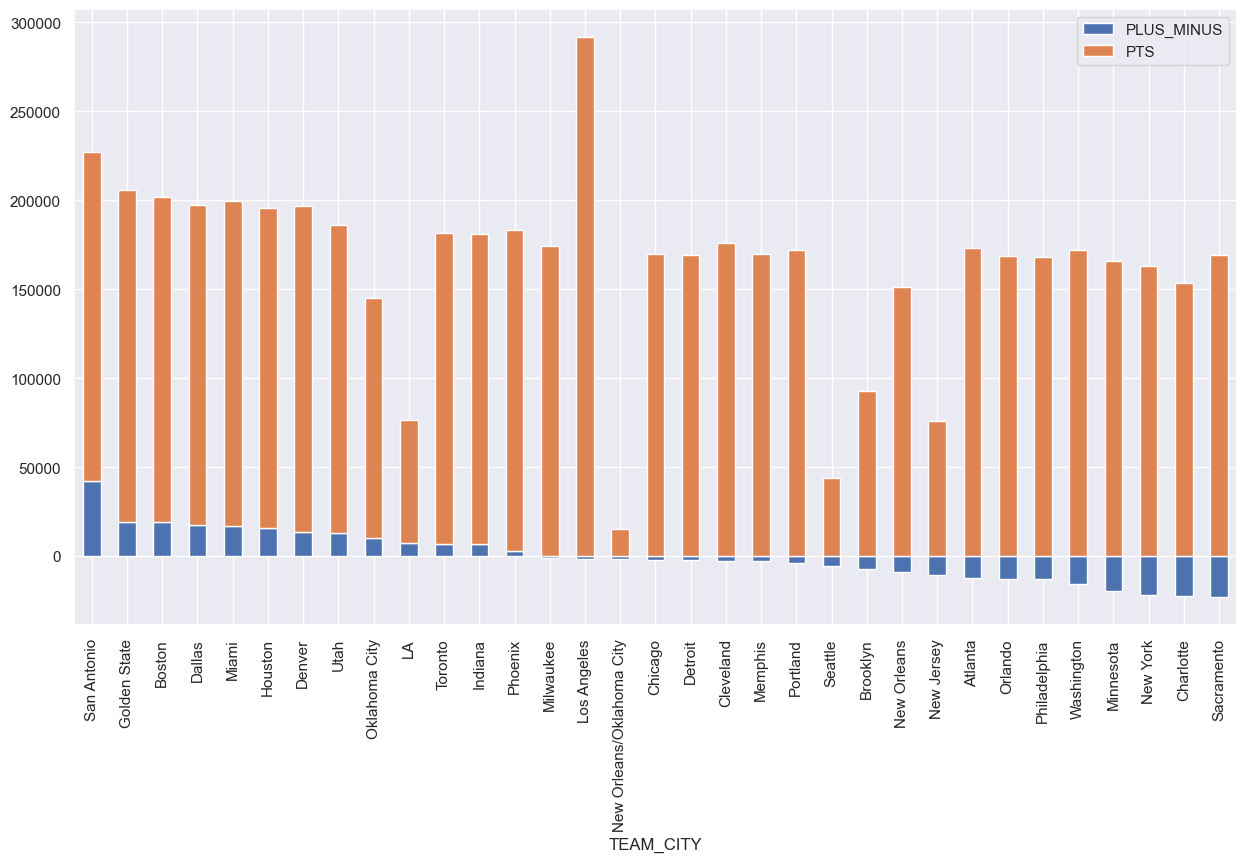

In [124]:
teams[['PLUS_MINUS', 'PTS']].plot(kind='bar',  stacked=True, figsize=(15, 8))

<AxesSubplot:xlabel='TEAM_CITY'>

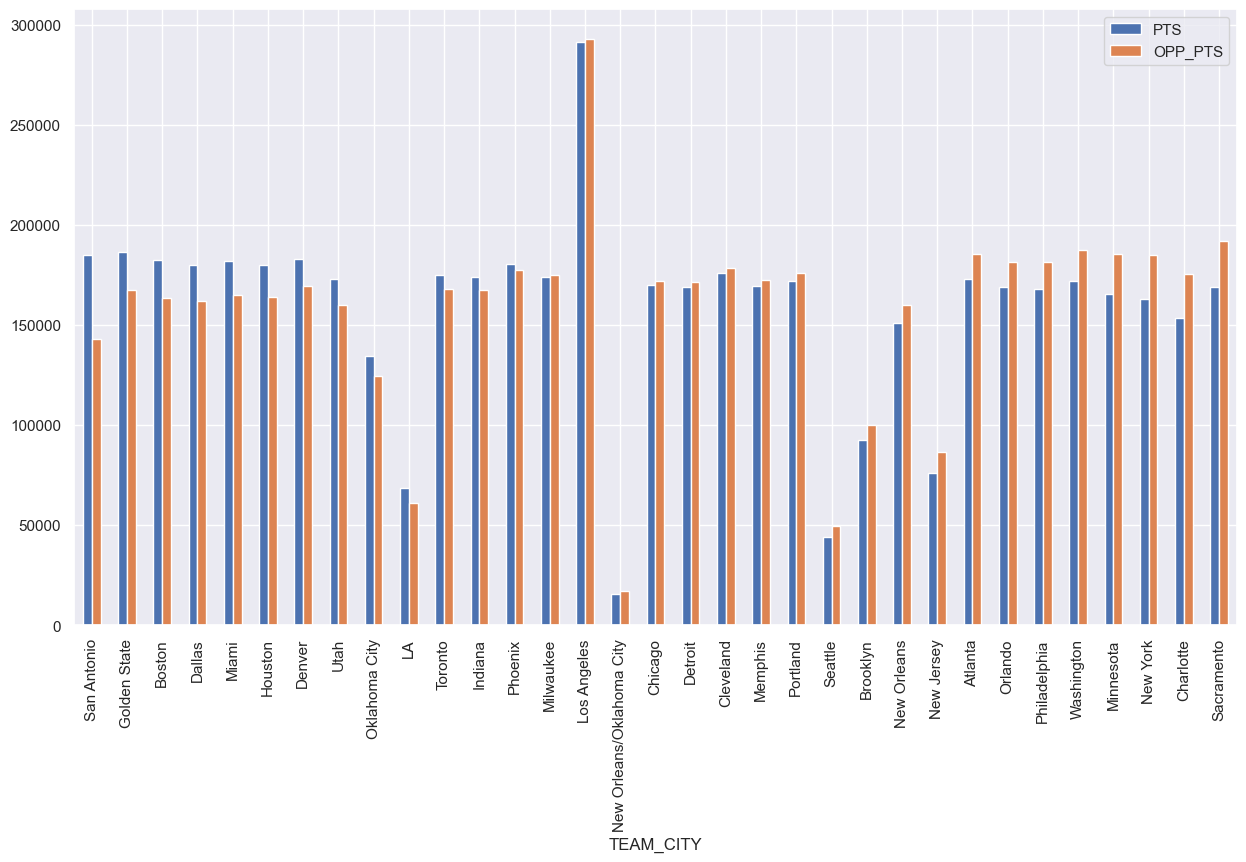

In [125]:
teams[['PTS', 'OPP_PTS']].plot(kind='bar', figsize=(15, 8))

In [126]:
players = clean_league.groupby(['PLAYER_NAME'])
games_played = players['MIN'].count()

players = players.sum()
players.insert(loc = 0, column = 'GAMES_PLAYED', value = games_played)

PointsPerGame = players['PTS'] / players['GAMES_PLAYED']
AvgPlusMin = players['PLUS_MINUS'] / players['GAMES_PLAYED']

players.insert(loc = 2, column = 'AVG_PLUS_MIN', value = PointsPerGame)
players.insert(loc = 4, column = 'PPG', value = PointsPerGame)

In [127]:
players

,GAMES_PLAYED,PLUS_MINUS,AVG_PLUS_MIN,PTS,PPG,FGM,FGA,FG_PCT,FG3M,FG3A,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
A.J. Guyton,1,0.0,4.000000,4.0,4.000000,0.0,4.0,0.000,0.0,2.0,...,4.0,1.000,1.0,1.0,2.0,1.0,1.0,0.0,0.0,2.0
A.J. Lawson,1,-6.0,8.000000,8.0,8.000000,2.0,3.0,0.667,2.0,2.0,...,2.0,1.000,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0
AJ Hammons,29,2.0,2.827586,82.0,2.827586,34.0,76.0,8.924,5.0,12.0,...,20.0,3.750,14.0,46.0,60.0,7.0,1.0,16.0,14.0,34.0
AJ Price,301,-55.0,6.086379,1832.0,6.086379,655.0,1686.0,103.594,267.0,805.0,...,343.0,96.154,83.0,352.0,435.0,647.0,143.0,9.0,279.0,289.0
Aamir Simms,2,6.0,2.000000,4.0,2.000000,1.0,2.0,1.000,0.0,0.0,...,2.0,1.000,3.0,2.0,5.0,2.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zion Williamson,92,175.0,25.619565,2357.0,25.619565,908.0,1494.0,57.090,17.0,55.0,...,767.0,62.348,245.0,394.0,639.0,289.0,81.0,49.0,242.0,192.0
Zoran Dragic,17,-15.0,1.647059,28.0,1.647059,11.0,33.0,1.362,3.0,15.0,...,5.0,2.000,5.0,4.0,9.0,5.0,2.0,0.0,5.0,6.0
Zoran Planinic,169,-199.0,3.852071,651.0,3.852071,225.0,553.0,53.642,40.0,144.0,...,240.0,47.778,53.0,170.0,223.0,189.0,68.0,7.0,137.0,264.0


In [128]:
PlusMinSum = players.sort_values(by = ['PLUS_MINUS'], ascending = False)
top20Sum = PlusMinSum.iloc[:20]

In [129]:
top20Sum

,GAMES_PLAYED,PLUS_MINUS,AVG_PLUS_MIN,PTS,PPG,FGM,FGA,FG_PCT,FG3M,FG3A,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
LeBron James,1703,8512.0,26.825015,45683.0,26.825015,16612.0,33053.0,857.181,2599.0,7552.0,...,13414.0,1221.083,2035.0,10831.0,12866.0,12263.0,2693.0,1322.0,5930.0,3214.0
Tim Duncan,1170,6509.0,17.245299,20177.0,17.245299,7908.0,15722.0,589.629,18.0,105.0,...,6326.0,756.594,2983.0,8817.0,11800.0,3355.0,808.0,2286.0,2433.0,2563.0
Stephen Curry,1008,6432.0,24.140873,24334.0,24.140873,8290.0,17625.0,469.650,3776.0,8917.0,...,4391.0,793.049,680.0,4010.0,4690.0,6434.0,1671.0,241.0,3185.0,2428.0
Manu Ginobili,1235,6104.0,13.605668,16803.0,13.605668,5440.0,12243.0,533.788,1798.0,4907.0,...,4982.0,848.319,788.0,3682.0,4470.0,4786.0,1595.0,370.0,2572.0,2655.0
Chris Paul,1363,5977.0,17.996332,24529.0,17.996332,8668.0,18364.0,632.781,1830.0,4956.0,...,6184.0,1043.314,851.0,5262.0,6113.0,12632.0,2848.0,202.0,3311.0,3368.0
Tony Parker,1345,5558.0,16.068401,21612.0,16.068401,8663.0,17639.0,637.715,474.0,1498.0,...,5071.0,816.169,484.0,3190.0,3674.0,7519.0,1094.0,105.0,3162.0,2143.0
Kevin Durant,1139,5095.0,26.958736,30706.0,26.958736,10486.0,21302.0,569.506,2168.0,5692.0,...,8605.0,978.440,806.0,7237.0,8043.0,4708.0,1238.0,1254.0,3525.0,2263.0
Draymond Green,843,4877.0,9.151839,7715.0,9.151839,2792.0,6383.0,347.998,746.0,2367.0,...,1940.0,396.192,992.0,5087.0,6079.0,4573.0,1191.0,912.0,1908.0,2479.0
Dirk Nowitzki,1330,4833.0,20.997744,27927.0,20.997744,9908.0,21014.0,625.729,1552.0,4100.0,...,7376.0,1047.120,1219.0,8715.0,9934.0,3213.0,997.0,1068.0,2175.0,2997.0


<AxesSubplot:xlabel='PLAYER_NAME'>

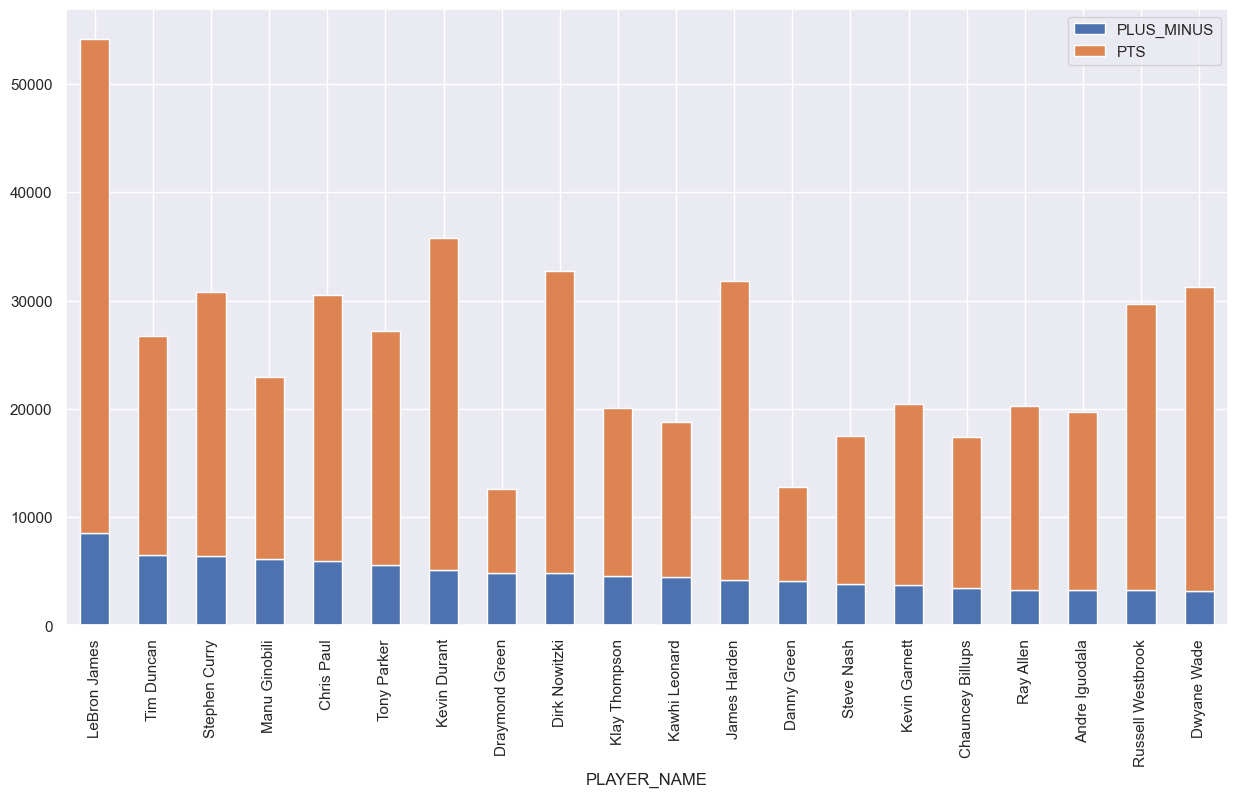

In [130]:
top20Sum[['PLUS_MINUS', 'PTS']].plot(kind='bar',  stacked=True, figsize=(15, 8))

In [131]:
PlusMinAvg = players.sort_values(by = ['AVG_PLUS_MIN'], ascending = False)
top20Avg = PlusMinAvg.iloc[:20]

In [132]:
top20Avg

,GAMES_PLAYED,PLUS_MINUS,AVG_PLUS_MIN,PTS,PPG,FGM,FGA,FG_PCT,FG3M,FG3A,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
Kevin Durant,1139,5095.0,26.958736,30706.0,26.958736,10486.0,21302.0,569.506,2168.0,5692.0,...,8605.0,978.440,806.0,7237.0,8043.0,4708.0,1238.0,1254.0,3525.0,2263.0
LeBron James,1703,8512.0,26.825015,45683.0,26.825015,16612.0,33053.0,857.181,2599.0,7552.0,...,13414.0,1221.083,2035.0,10831.0,12866.0,12263.0,2693.0,1322.0,5930.0,3214.0
Kobe Bryant,1025,2330.0,26.621463,27287.0,26.621463,9411.0,21210.0,452.471,1636.0,4995.0,...,8134.0,823.277,1047.0,4370.0,5417.0,5041.0,1491.0,392.0,3191.0,2478.0
Luka Doncic,279,482.0,26.050179,7268.0,26.050179,2490.0,5437.0,126.003,758.0,2251.0,...,2104.0,196.699,290.0,2071.0,2361.0,2184.0,294.0,114.0,1134.0,625.0
Allen Iverson,461,58.0,25.863341,11923.0,25.863341,4051.0,9367.0,197.277,456.0,1455.0,...,4197.0,361.478,256.0,1221.0,1477.0,3105.0,881.0,61.0,1619.0,733.0
Zion Williamson,92,175.0,25.619565,2357.0,25.619565,908.0,1494.0,57.090,17.0,55.0,...,767.0,62.348,245.0,394.0,639.0,289.0,81.0,49.0,242.0,192.0
Joel Embiid,366,2022.0,24.967213,9138.0,24.967213,2985.0,6165.0,176.281,413.0,1269.0,...,3401.0,291.477,829.0,3202.0,4031.0,1154.0,304.0,591.0,1226.0,1143.0
Trae Young,299,-250.0,24.682274,7380.0,24.682274,2371.0,5471.0,127.675,752.0,2164.0,...,2172.0,246.707,190.0,950.0,1140.0,2646.0,287.0,47.0,1231.0,533.0
James Harden,1127,4211.0,24.444543,27549.0,24.444543,8134.0,18473.0,493.061,3059.0,8509.0,...,9577.0,926.614,870.0,5343.0,6213.0,7413.0,1766.0,596.0,4175.0,3021.0


<AxesSubplot:xlabel='PLAYER_NAME'>

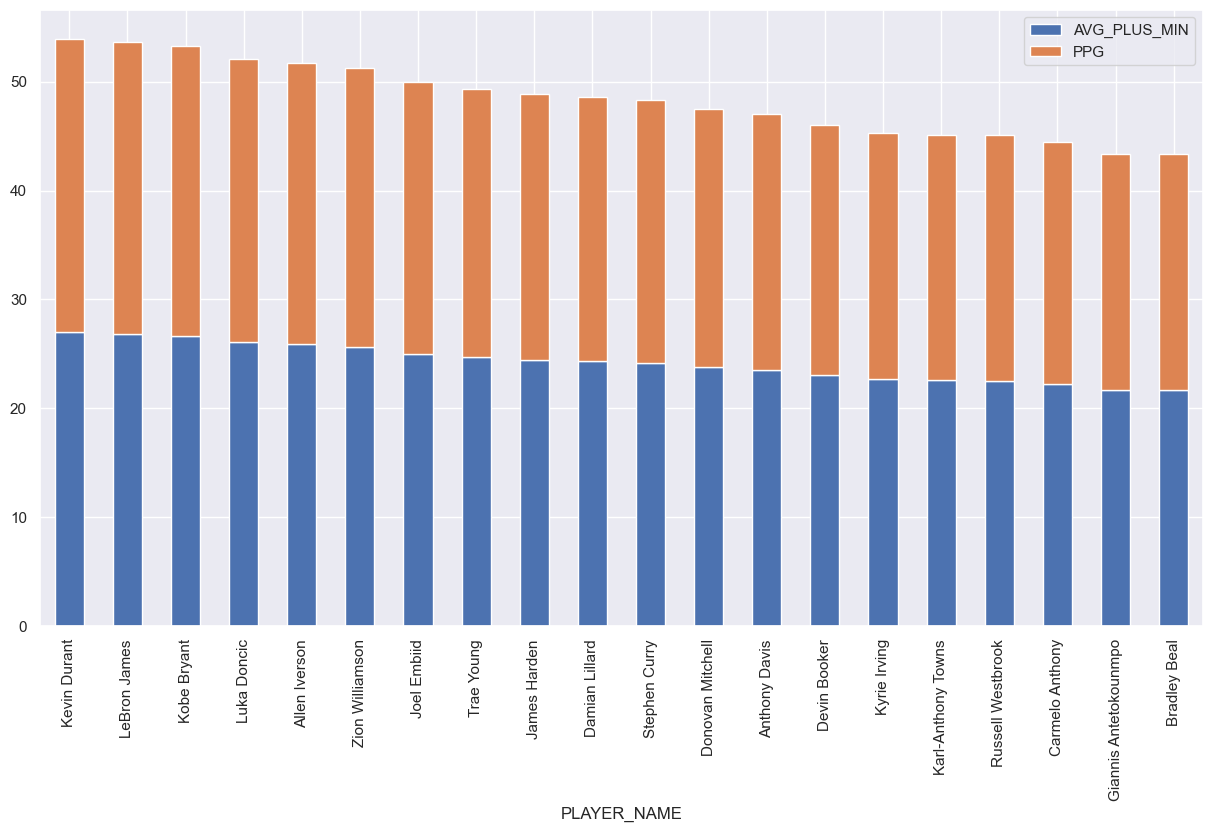

In [133]:
top20Avg[['AVG_PLUS_MIN', 'PPG']].plot(kind='bar',  stacked=True, figsize=(15, 8))

In [134]:
corr_matrix = clean_league.corr()
corr_matrix.sort_values(by = 'PLUS_MINUS', ascending = False)

,PLUS_MINUS,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLUS_MINUS,1.000000,0.204389,0.196867,0.094922,0.191512,0.157843,0.077233,0.137900,0.112862,0.103394,0.098484,0.042987,0.175194,0.152283,0.170968,0.122468,0.089076,-0.016157,0.012890
PTS,0.204389,1.000000,0.960353,0.881684,0.444453,0.554851,0.514154,0.372936,0.668489,0.654966,0.508810,0.243506,0.442952,0.439300,0.430077,0.306815,0.161626,0.415912,0.271850
FGM,0.196867,0.960353,1.000000,0.884617,0.496714,0.478217,0.441318,0.320417,0.470505,0.477921,0.381143,0.272387,0.445859,0.453140,0.401419,0.292207,0.176022,0.392979,0.269415
FG_PCT,0.191512,0.444453,0.496714,0.209148,1.000000,0.208262,0.035220,0.297069,0.137355,0.155894,0.159967,0.149460,0.210866,0.222597,0.091089,0.101102,0.131282,0.125848,0.174778
DREB,0.175194,0.442952,0.445859,0.445862,0.210866,0.092210,0.109980,0.025086,0.322914,0.358980,0.255081,0.394507,1.000000,0.929412,0.214525,0.176729,0.328532,0.293864,0.283766
AST,0.170968,0.430077,0.401419,0.471379,0.091089,0.252139,0.328359,0.182306,0.310344,0.297364,0.250880,0.002095,0.214525,0.166234,1.000000,0.296455,-0.002456,0.388286,0.129855
FG3M,0.157843,0.554851,0.478217,0.457543,0.208262,1.000000,0.821595,0.722485,0.153433,0.122881,0.154254,-0.112408,0.092210,0.025946,0.252139,0.159082,-0.054619,0.163513,0.075584
REB,0.152283,0.439300,0.453140,0.450951,0.222597,0.025946,0.031240,-0.032090,0.325963,0.374418,0.257454,0.705771,0.929412,1.000000,0.166234,0.169740,0.365545,0.282110,0.312106
FG3_PCT,0.137900,0.372936,0.320417,0.248435,0.297069,0.722485,0.457253,1.000000,0.079709,0.054109,0.098014,-0.128059,0.025086,-0.032090,0.182306,0.109315,-0.073288,0.099052,0.034666
STL,0.122468,0.306815,0.292207,0.326812,0.101102,0.159082,0.204688,0.109315,0.217153,0.221681,0.182931,0.083381,0.176729,0.169740,0.296455,1.000000,0.058277,0.230167,0.143878


<AxesSubplot:>

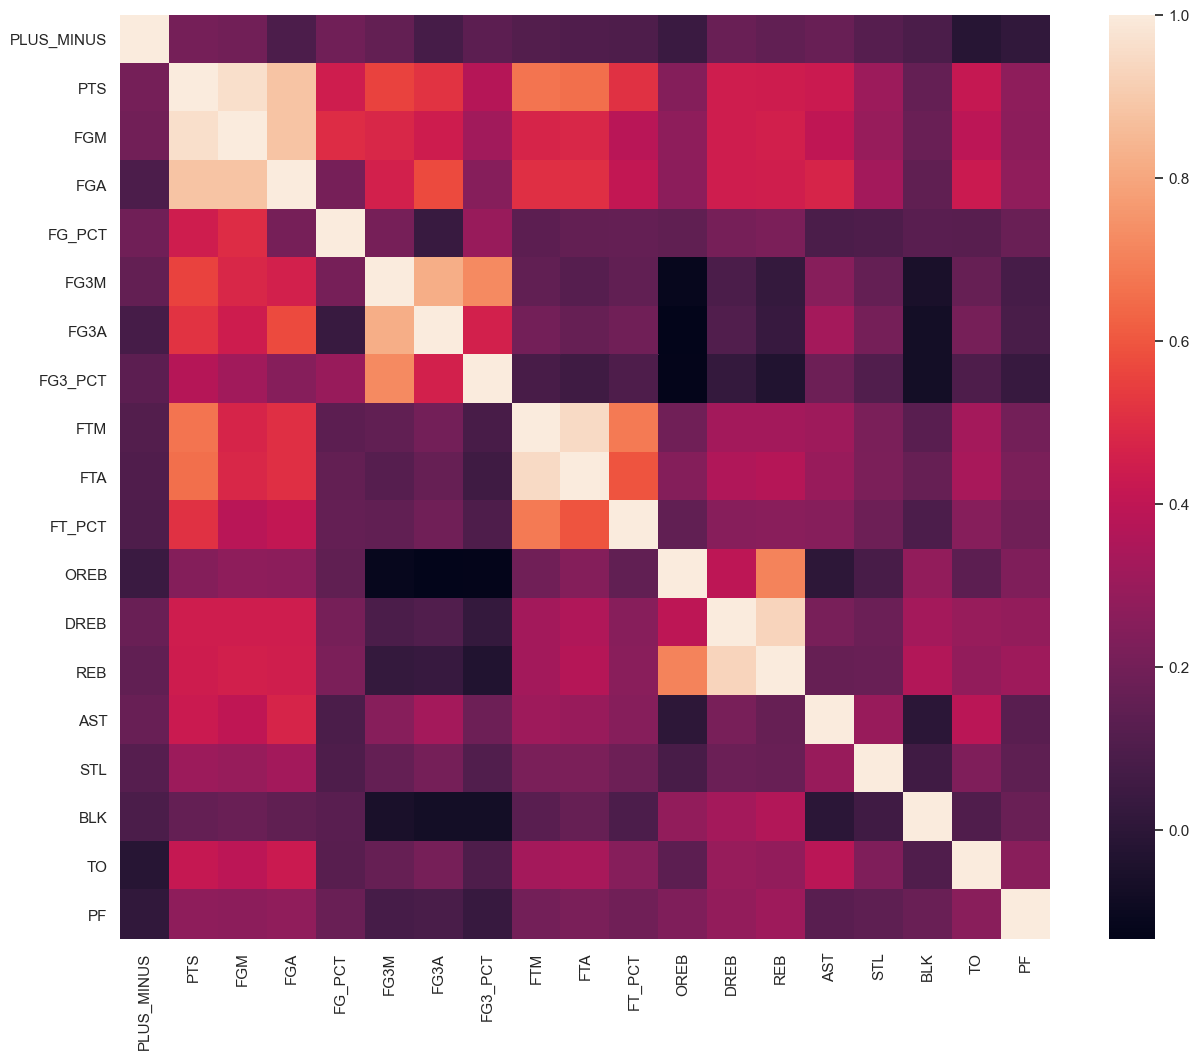

In [135]:
plt.figure(figsize = (15, 12))
sns.heatmap(corr_matrix)

In [136]:
basket = NBA.groupby(['GAME_ID', 'PLAYER_NAME'])
basket = basket['MIN']
basket = basket.count()
basket = basket.unstack()
basket = basket.reset_index()
basket = basket.fillna(0)
basket = basket.set_index('GAME_ID')

basket

PLAYER_NAME,A.J. Guyton,A.J. Lawson,AJ Hammons,AJ Price,Aamir Simms,Aaron Brooks,Aaron Craft,Aaron Gordon,Aaron Gray,Aaron Harrison,...,Zeljko Rebraca,Zendon Hamilton,Zhaire Smith,Zhou Qi,Ziaire Williams,Zion Williamson,Zoran Dragic,Zoran Planinic,Zydrunas Ilgauskas,Zylan Cheatham
GAME_ID,,,,,,,,,,,,,,,,,,,,,
10300001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10300002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10300003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10300004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10300005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52000111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52000121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52000131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
frequent_items = apriori(
    basket.astype(bool), 
    min_support = 0.03, 
    use_colnames = True
)

frequent_items.sort_values(by = 'support', ascending = False)

,support,itemsets
111,0.066308,(LeBron James)
8,0.057620,(Andre Iguodala)
107,0.056802,(Kyle Korver)
53,0.055867,(Dwight Howard)
25,0.055205,(Carmelo Anthony)
...,...,...
6,0.030154,(Anderson Varejao)
105,0.030115,(Kosta Koufos)
160,0.030115,(Roy Hibbert)
7,0.030076,(Andre Drummond)


In [138]:
rules = association_rules(
    frequent_items, 
    metric = 'confidence',
    min_threshold = 0.6
)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Dwyane Wade),(Udonis Haslem),0.050608,0.041803,0.033933,0.670516,16.039887,0.031818,2.908173
1,(Udonis Haslem),(Dwyane Wade),0.041803,0.050608,0.033933,0.811743,16.039887,0.031818,5.043059
2,(Tim Duncan),(Manu Ginobili),0.045582,0.048114,0.039037,0.856410,17.799464,0.036844,6.629203
3,(Manu Ginobili),(Tim Duncan),0.048114,0.045582,0.039037,0.811336,17.799464,0.036844,5.058825
4,(Manu Ginobili),(Tony Parker),0.048114,0.052400,0.042426,0.881781,16.827929,0.039905,8.015659
5,(Tony Parker),(Manu Ginobili),0.052400,0.048114,0.042426,0.809665,16.827929,0.039905,5.001118
6,(Mike Conley),(Marc Gasol),0.042309,0.041024,0.030076,0.710866,17.328108,0.028341,3.316714
7,(Marc Gasol),(Mike Conley),0.041024,0.042309,0.030076,0.733143,17.328108,0.028341,3.588783
8,(Tim Duncan),(Tony Parker),0.045582,0.052400,0.041530,0.911111,17.387658,0.039142,10.660501
9,(Tony Parker),(Tim Duncan),0.052400,0.045582,0.041530,0.792565,17.387658,0.039142,4.601047
